# Cluster Analysis

This exercise sheet covers the following concepts.
- $k$-Means Clustering
- EM-Clustering
- DBSCAN Clustering
- Hiearchical Clustering

## Libraries and Data

We use the boston house price data in this exercise. The data is available as part of ```sklearn``` for [Python](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

Last week we explored the boston data, this week we use it for clustering. You will apply both $k$-means clustering and DB clustering to the boston data using all fourteen columns. Functions for all clustering algorithms are available in ```sklearn``` for Python. If you experience problems with the visualizations, ensure that your ```matplotlib``` version is at least 3.0.1 and your ```seaborn``` version is at least 0.9.0. 

There are a couple of problems with clustering data like the boston data, that you will have to solve during this exercise.
- The different features of the data are on different scales, which influences the results. 
- The data has fourteen dimensions. This makes visualizing the clusters difficult. You can try a dimension reduction technique like Principle Component Analysis (PCA) to get only two dimensions or use pair-wise plots. Both have advantages and drawbacks, which you should explore as part of this exercise. 



In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,9))
from sklearn.datasets import *
boston_dataset = load_boston()
boston= pd.DataFrame(boston_dataset.data, columns= boston_dataset.feature_names)

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(boston) 
x = pd.DataFrame(x, columns=boston_dataset.feature_names)
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<Figure size 2400x1350 with 0 Axes>

In [41]:
plt.rcParams['figure.dpi'] = 150 


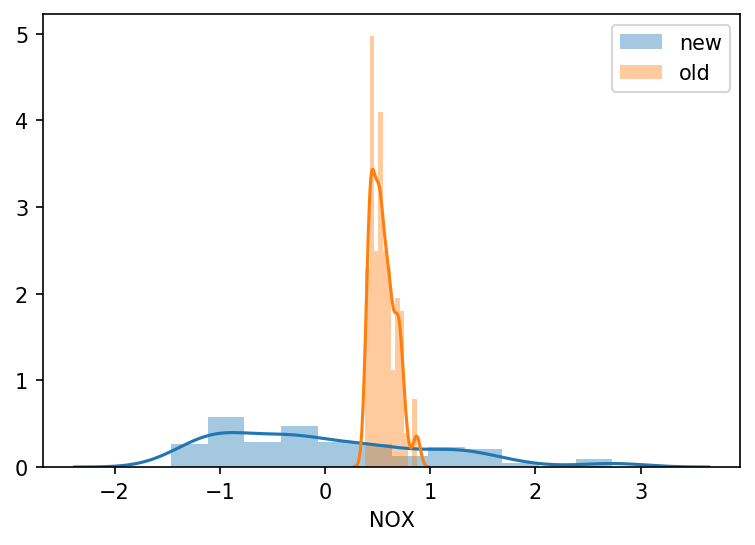

In [42]:
sns.distplot(x.NOX, label="new")
sns.distplot(boston.NOX, label="old")
plt.legend()

# Approach 1: Principle Component

In [43]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=1) #PCA is clever, it also centers the data first
pca1 = pcamodel.fit_transform(x)
pca1.shape

(506, 1)

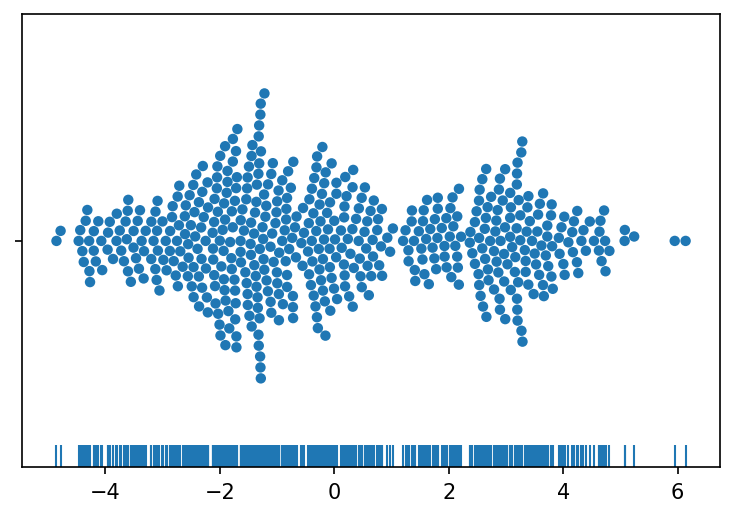

In [44]:
sns.rugplot(pca1.flatten())
sns.swarmplot(x=pca1.flatten())

In [45]:
pcamodel = PCA(n_components=2) #PCA is clever, it also centers the data first

pca2 = pcamodel.fit_transform(x)
pca2.shape

(506, 2)

In [46]:
pca2

array([[-2.09829747,  0.77311221],
       [-1.45725167,  0.59198535],
       [-2.07459756,  0.59963944],
       ...,
       [-0.31236047,  1.15524634],
       [-0.27051907,  1.0413615 ],
       [-0.12580322,  0.76197802]])

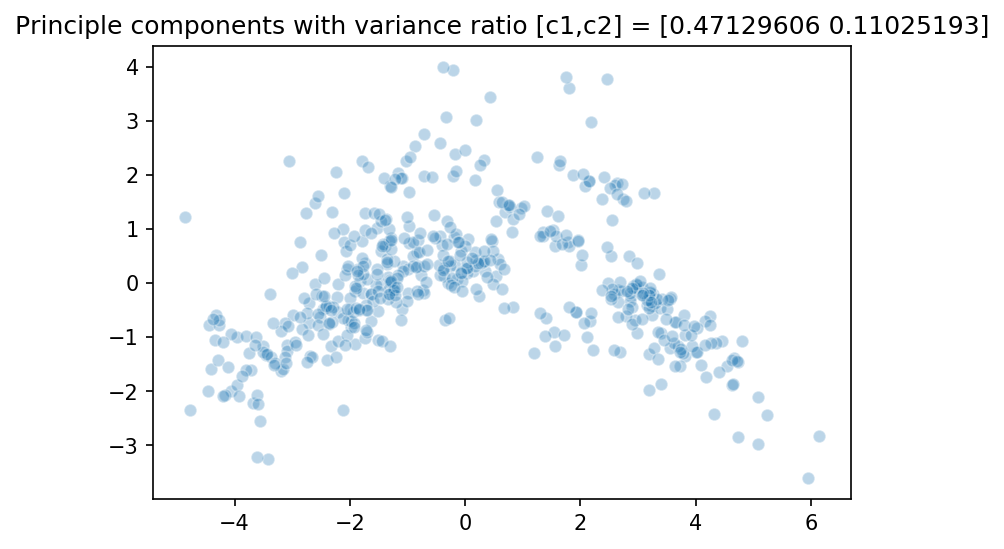

In [8]:
sns.scatterplot(pca2[:,0], pca2[:,1], alpha=0.3)
plt.title(f"Principle components with variance ratio [c1,c2] = {pcamodel.explained_variance_ratio_}");

## $k$-Means Clustering

Use $k$-Means to cluster the data and find a suitable number of clusters for $k$. Use a combination of knowledge you already have about the data, visualizations, as well as the within-sum-of-squares to determine a suitable number of clusters. 

In [9]:
from sklearn.cluster import KMeans

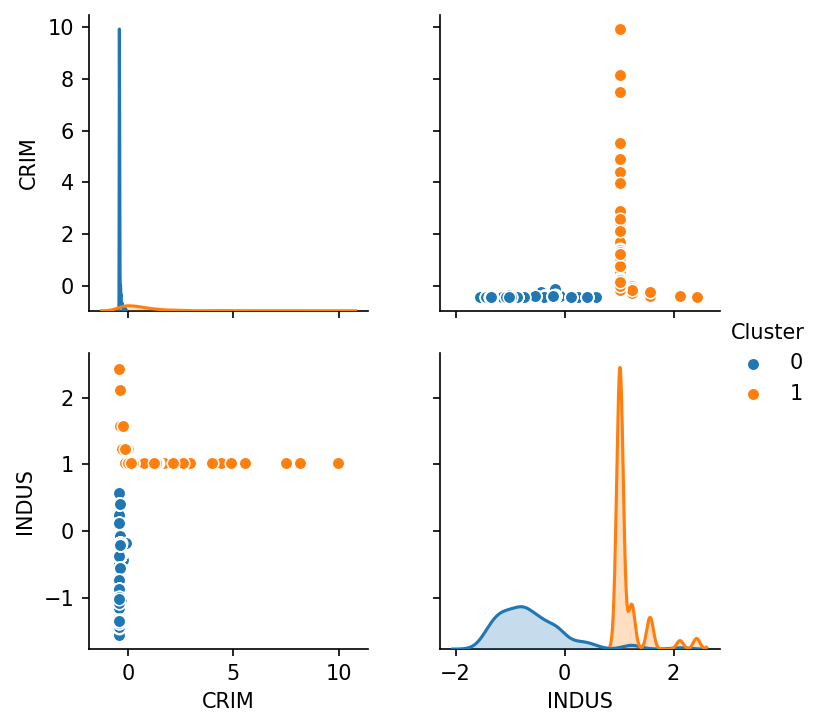

In [10]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=1, max_iter=10, 
    tol=1e-04, random_state=0
    )
y_km = km.fit_predict(x)
x["Cluster"]=y_km
sns.pairplot(x,vars=["CRIM", "INDUS"], hue = "Cluster")

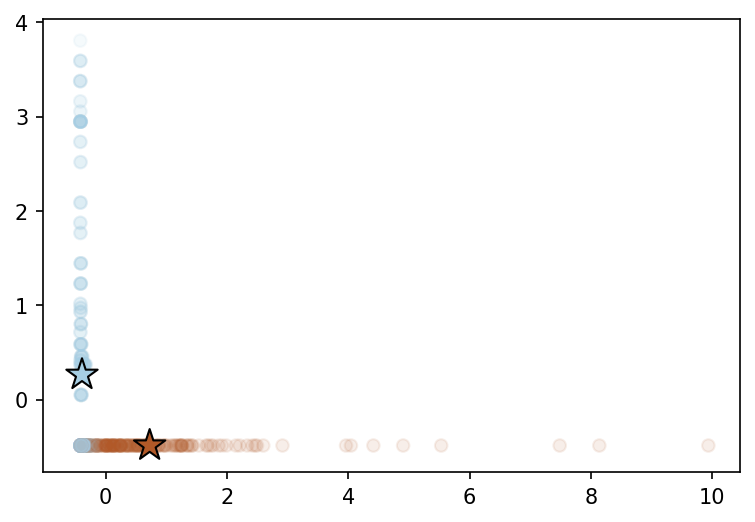

In [18]:
plt.scatter(x["CRIM"] , x["ZN"], c=y_km, cmap=plt.cm.Paired, alpha=0.1)
plt.scatter(zz[0],zz[1], 
        s=250, marker='*', label='centroids',
        edgecolor='black',
      c=np.arange(0,2),cmap=plt.cm.Paired,)

In [12]:
zz=km.cluster_centers_.T
zz

array([[-0.39012396,  0.72514566],
       [ 0.26239167, -0.48772236],
       [-0.62036759,  1.15311264],
       [ 0.00291182, -0.00541237],
       [-0.58467512,  1.086769  ],
       [ 0.24331476, -0.45226302],
       [-0.43510819,  0.80876041],
       [ 0.45722226, -0.8498651 ],
       [-0.58380115,  1.0851445 ],
       [-0.63145993,  1.1737306 ],
       [-0.28580826,  0.53124811],
       [ 0.32645106, -0.60679321],
       [-0.44642061,  0.82978746]])

In [14]:
km.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='random', max_iter=10, n_clusters=2,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)>

In [20]:
# checking good value for the  within sum of squares
wss= []
index = []
for i in range(1,10):
    km = KMeans(
    n_clusters=i, init='random',
    n_init=1, max_iter=100, 
    tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(pca2)
    wss.append(km.inertia_)
    index.append(i)

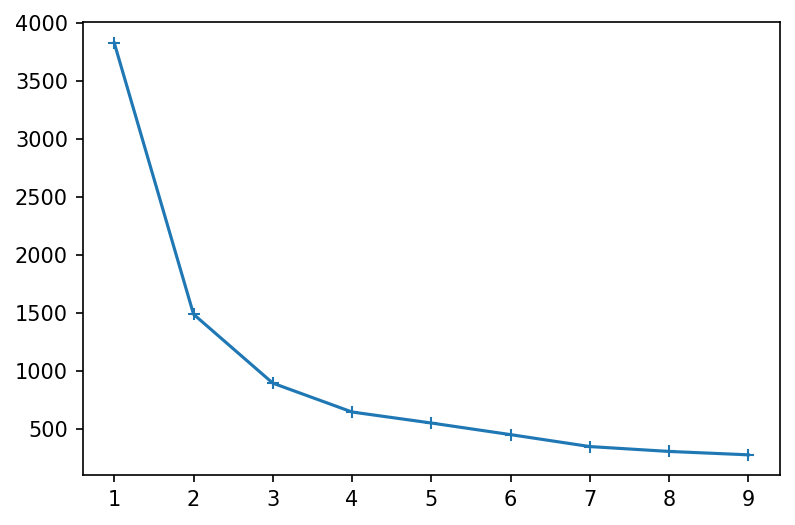

In [21]:
plt.plot(index,wss, marker= "+" )

## EM Clustering

(Note: EM clustering is also known as Gaussian Mixture Models and can be found in the mixture package of ```sklearn```.)

Use the EM algorithm to determine multivariate clusters in the data. Determine a suitable number of clusters using the Bayesian Information Criterion (BIC). 

In [29]:
boston= pd.DataFrame(boston_dataset.data, columns= boston_dataset.feature_names)

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(boston) 
X = pd.DataFrame(x, columns=boston_dataset.feature_names)

In [30]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=3, n_init=10)

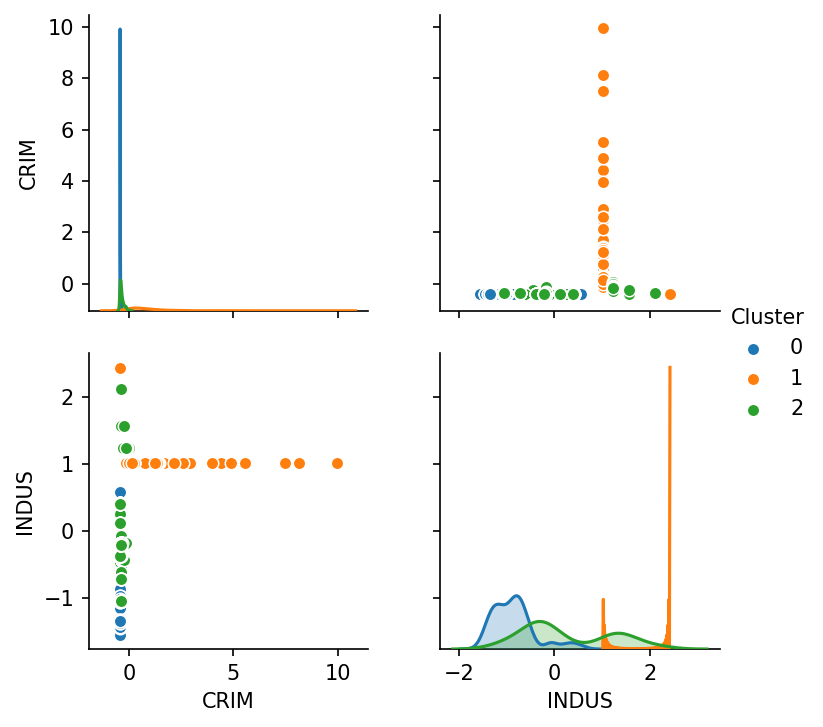

In [48]:
y_labels= gmm.fit_predict(X)
X["Cluster"]=y_labels
sns.pairplot(X,vars=["CRIM", "INDUS"], hue = "Cluster")

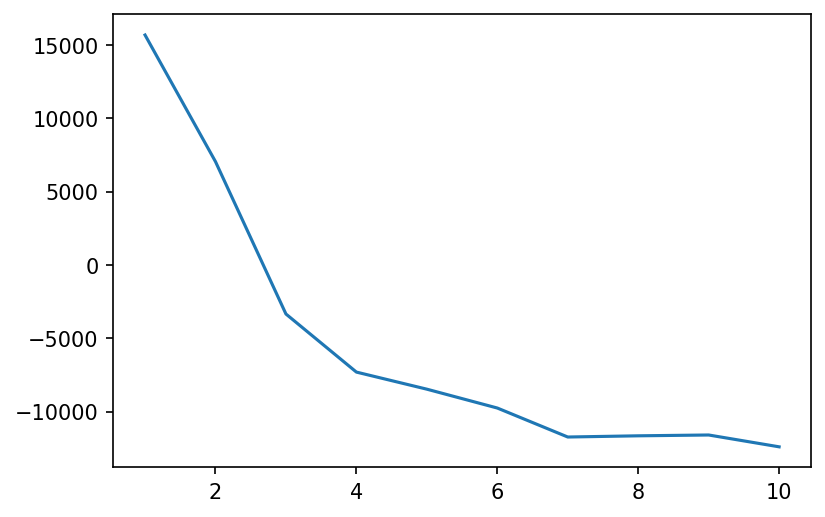

In [50]:
index= []
bic = []
for i in range(1,11):
    gmm = GaussianMixture(n_components=i, n_init=10)
    gmm.fit(X)
    index.append(i)
    bic.append(gmm.bic(X))
plt.plot(index,bic)

## DBSCAN Clustering

Use DBSCAN to cluster the data and find suitable values for $epsilon$ and $minPts$.  Use a combination of knowledge you already have about the data and visualizations. 

## Hierarchical Clustering

(Note: Hierarchical clustering is also known as agglomerative clustering and can be found under that name in ```sklearn```. This task requires at least ```sklearn``` version 0.22, which is still under development (October 2019). You can find guidance on how to install packages in Jupyter notebook [here](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/) and regarding the development version of ```sklearn``` [here](https://scikit-learn.org/stable/developers/advanced_installation.html).)

Use hierarchical clustering with single linkage to determine clusters within the housing data. Find a suitable cut-off for the clusters using a dendrogram. 



## Compare the Clustering Results

How are the clustering results different between the algorithms? Consider, e.g., the number of clusters, the shape of clusters, general problems with using the algorithms, and the insights you get from each algorithm. 

You may also use this to better understand the differences between the algorithms. For example, how are the results from EM clustering different/similar to the results of the $k$-Means clustering? Is there a relationship between the WSS and the BIC? How are the mean values of EM related to the centroids of $k$-Means? What is the relationship between the parameters for DBSCAN and the cut-off for the hierarchical clustering?